In [1]:
# скачал файл с googlesheets в рабочую директорию
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Чтение Excel файла
excel_file = 'analyst_test_RBK.xlsx'
excel_data = pd.read_excel(excel_file, sheet_name=None) # сохраняем в словарь

In [3]:
baza = excel_data['База публикаций'] # вытаскиваем из словаря один лист в один датасет
baza.head(3)

,ID публикации,Заголовок материала,URL
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55
2,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60


In [4]:
download = excel_data['Выгрузка'] # второй длист во второй датасет
download.head(3)

,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819


In [5]:
# Из отчёта должны быть исключены просмотры, содержащие след. URL: 
excluded = ['test.pro', 'test.v2.pro', 'feature-rbcnews', '/preview/', 'staging.pro', 'staging.v2.pro']



In [6]:
# Фильтрация датасета
filtered = download[~download['Адрес страницы'].str.contains('|'.join(excluded), regex=True)]


# С помощью метода str.contains() мы проверяем, содержит ли каждая строка в столбце URL любое из значений 
# списка excluded. Затем мы используем оператор инверсии ~ и фильтруем датасет baza, чтобы получить только 
# строки, которые не содержат исключающие значения.
filtered

,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
...,...,...
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1
2694,https://pro.rbc.ru/news/5c643a319a794760bbe62974,1


In [7]:
print(download.shape[0] - filtered.shape[0])
# отфильтровали 231 сроку

231


In [8]:
# объединяем датасеты
df = baza.merge(filtered, left_on= 'URL', right_on= 'Адрес страницы', how = 'outer' )

In [9]:
df.head(3)

,ID публикации,Заголовок материала,URL,Адрес страницы,Просмотры
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b,NaN,NaN
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55,22.0
2,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55,6.0


In [10]:
df.shape

(2545, 5)

In [11]:
# у одной публикации может быть не 1 ссылка - сгруппирую и посчитаю сколько ссылок у каждой публикации
df.groupby('ID публикации', as_index=False) \
    .agg({'URL':'count'}) \
    .sort_values('URL', ascending = False) \
    .rename(columns = {'URL' : 'Число ссылок'})

,ID публикации,Число ссылок
424,5c61515a9a79476f6ed74e1b,49
435,5c62bbac9a7947e7b47f72ba,36
450,5c658e479a79474d32847233,33
443,5c6454df9a794769a732e049,33
391,5c5ac8f29a7947453a4deb9f,32
...,...,...
164,5c35e57d9a79470ff2adf219,1
162,5c35c30a9a79470370e6227f,1
161,5c35bc789a7947ff8b87a348,1
155,5c249ff09a79477fe96235f9,1


In [12]:
# у одной публикации может быть не 1 ссылка - сгруппирую и посчитаю сколько ссылок у каждой публикации
forTop20 = df.groupby(['ID публикации', 'Заголовок материала', 'Адрес страницы'], as_index = False) \
                .agg({'URL':'count', 'Просмотры' : 'sum'}) \
                .sort_values('Просмотры', ascending = False) \
                .rename(columns = {'URL' : 'Число ссылок', 'Просмотры' : 'Сумма просмотров'})
forTop20

,ID публикации,Заголовок материала,Адрес страницы,Число ссылок,Сумма просмотров
370,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,33,11320.0
371,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,27,7422.0
252,5c503adb9a794784a693903b,Недооцененный экспорт: что имеет смысл продава...,https://pro.rbc.ru/news/5c503adb9a794784a693903b,24,7044.0
363,5c6454df9a794769a732e049,Требования работодателя vs ожидания кандидатов...,https://pro.rbc.ru/news/5c6454df9a794769a732e049,33,6483.0
362,5c643a319a794760bbe62974,Восемь способов увеличить средний чек,https://pro.rbc.ru/news/5c643a319a794760bbe62974,29,6325.0
...,...,...,...,...,...
199,5c472eef9a7947216403e0ec,В Московском регионе за год ввели 805 тыс. кв....,https://pro.rbc.ru/news/5c472eef9a7947216403e0ec,1,2.0
5,5c07ef8c9a7947175a925dfb,Полба — новый суперфуд: как менялась мода на п...,https://pro.rbc.ru/news/5c07ef8c9a7947175a925dfb,1,2.0
166,5c4185729a79472af5fd3e5d,Какие неудобства ждут клиентов самозанятых гра...,https://pro.rbc.ru/news/5c4185729a79472af5fd3e5d,1,2.0
15,5c0fcd779a7947a6b2f354f7,Ставка на zero: как девелоперы расплачиваются ...,https://pro.rbc.ru/news/5c0fcd779a7947a6b2f354f7,1,1.0


In [13]:
Top20 = forTop20.head(20)
Top20

,ID публикации,Заголовок материала,Адрес страницы,Число ссылок,Сумма просмотров
370,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,33,11320.0
371,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,27,7422.0
252,5c503adb9a794784a693903b,Недооцененный экспорт: что имеет смысл продава...,https://pro.rbc.ru/news/5c503adb9a794784a693903b,24,7044.0
363,5c6454df9a794769a732e049,Требования работодателя vs ожидания кандидатов...,https://pro.rbc.ru/news/5c6454df9a794769a732e049,33,6483.0
362,5c643a319a794760bbe62974,Восемь способов увеличить средний чек,https://pro.rbc.ru/news/5c643a319a794760bbe62974,29,6325.0
366,5c6579039a794742acb7ebe3,Менеджеры РФ получают дополнительное образован...,https://pro.rbc.ru/news/5c6579039a794742acb7ebe3,29,5656.0
338,5c60c9fd9a794747ed04cfe2,Как трансформируется логистика в ретейле: лучш...,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2,14,5471.0
350,5c627bba9a7947cb36ac9898,Эксперты: российскому рынку кофеен можно «попр...,https://pro.rbc.ru/news/5c627bba9a7947cb36ac9898,16,5277.0
345,5c6195799a79478b57ba6cf3,Математика российского люкса: точный портрет п...,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,14,5276.0
359,5c6400fa9a79474974a37aab,Россиянам все труднее платить ипотеку и покупа...,https://pro.rbc.ru/news/5c6400fa9a79474974a37aab,13,4857.0


C:\Users\artem\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

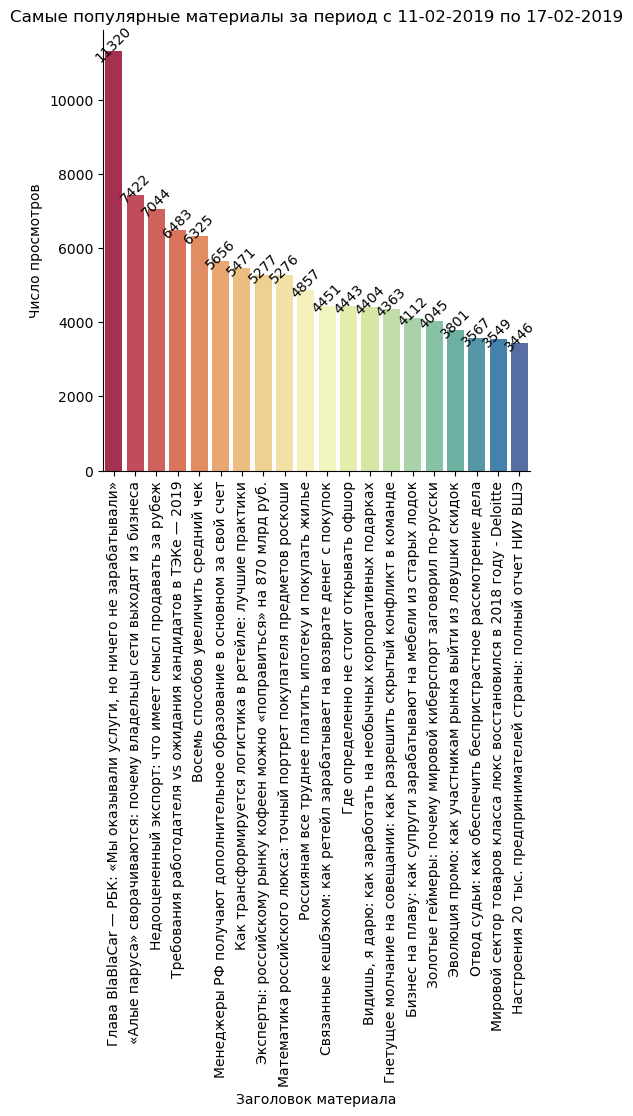

In [14]:
%matplotlib inline
plt.figure(figsize=(10, 6)) # сделаем график побольше

plot = sns.catplot(data=Top20, x="Заголовок материала", y="Сумма просмотров", kind="bar", palette = 'Spectral')
plot.set_xticklabels(rotation=90)

plt.title('Самые популярные материалы за период с 11-02-2019 по 17-02-2019')
plt.xlabel('Заголовок материала')
plt.ylabel('Число просмотров')
#plt.legend()
ax = plot.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', rotation=45)


plt.show()

In [15]:
# сохраняем
Top20.to_excel('top20news.xlsx', index=False)

C:\Users\artem\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

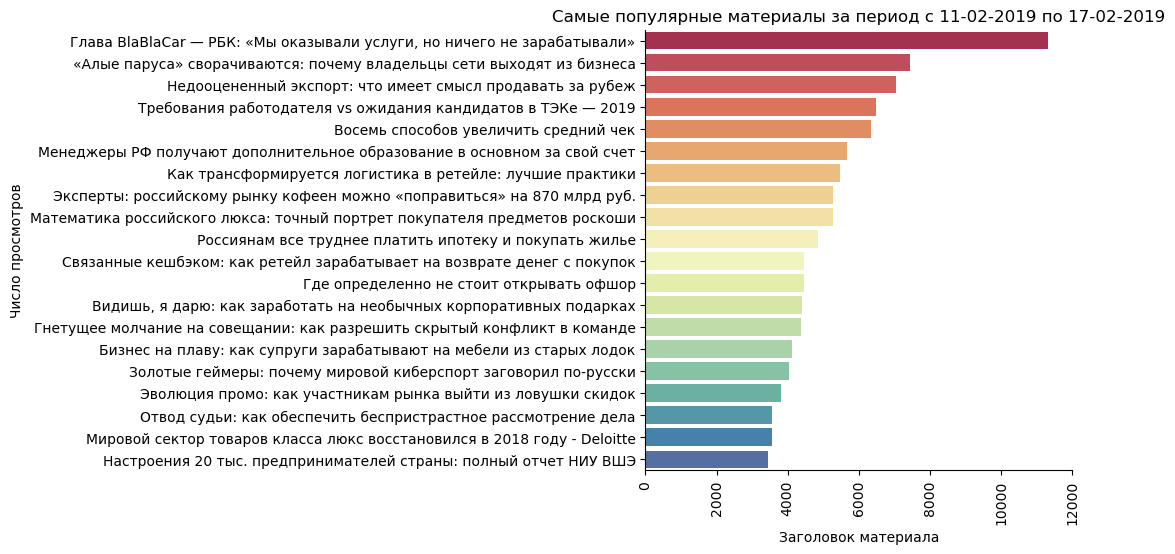

In [25]:
%matplotlib inline
plt.figure(figsize=(10, 6)) # сделаем график побольше

plot = sns.catplot(data=Top20, x="Сумма просмотров", y="Заголовок материала", kind="bar", palette = 'Spectral')
plot.set_xticklabels(rotation=90)

plt.title('Самые популярные материалы за период с 11-02-2019 по 17-02-2019')
plt.xlabel('Заголовок материала')
plt.ylabel('Число просмотров')


plt.show()